<a href="https://colab.research.google.com/github/popthart/Machine-learning/blob/cs-homework/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

1. Load The Dataset


In [11]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

2. Checking target and sample sizes

In [12]:
print(f'Target size: {breast_cancer.target.shape}')
print(f'Sample size: {breast_cancer.data.shape}')

Target size: (569,)
Sample size: (569, 30)


3. Split the Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data,
    breast_cancer.target,
    test_size=0.2,
    random_state=11
)

4. Training and Testing Set Sizes

In [14]:
print(f'Training: {X_train.shape}')
print(f'Testing: {X_test.shape}')

Training: (455, 30)
Testing: (114, 30)


5. Creat Model

In [15]:
nb = GaussianNB()

6. Train

In [16]:
nb.fit(X_train, y_train)

GaussianNB()

7. Predictions

In [17]:
y_pred = nb.predict(X_test)

8. Estimator method score

In [18]:
print(f'Accuracy: {nb.score(X_test, y_test):.2f}')

Accuracy: 0.94


9. Confusuion Matrix

In [19]:
con_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(con_matrix)

Confusion matrix:
[[32  6]
 [ 1 75]]


10. Classification Report

In [20]:
print('Classification report:')
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

Classification report:
              precision    recall  f1-score   support

   malignant       0.97      0.84      0.90        38
      benign       0.93      0.99      0.96        76

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



11. Visualize Confusion Matrix

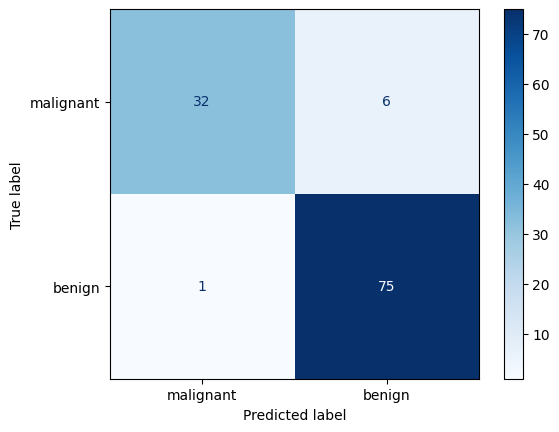

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=breast_cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

12. K fold cross validation

In [24]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=11)
scores= cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
print(f'K-Fold Scores: {scores}')
print(f'Average score: {scores.mean():.2f}')

K-Fold Scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Average score: 0.94


13. Find the best model

In [28]:
estimators={
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver = 'lbfgs', multi_class='ovr', max_iter = 10000),
    'SVC': SVC(gamma='scale')
}

In [35]:
model_scores = {}

In [37]:
for name, model in estimators.items():
    scores = cross_val_score(model, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    model_scores[name] = scores.mean()
    print(f"{name} average cross-validation score: {scores.mean():.2f}")

GaussianNB average cross-validation score: 0.94
KNeighborsClassifier average cross-validation score: 0.93
LogisticRegression average cross-validation score: 0.95
SVC average cross-validation score: 0.92


In [38]:
best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]

print(f"\nThe best model is {best_model_name} with an average cross-validation score of {best_model_score:.2f}")


The best model is LogisticRegression with an average cross-validation score of 0.95
